In [174]:
# EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Visualização
import plotly.express as px
import plotly.graph_objects as go

# Preparação dos dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss, roc_curve, \
                            roc_auc_score, f1_score, precision_score, recall_score
                            
# Otimização de hiperparâmetros
import optuna


# carga dos dados

In [9]:
# Carga do dataset

df_employee = pd.read_csv('./dataset/employee_churn.csv', parse_dates=['data_contratacao', 'data_demissao', 'data_ultimo_feedback', 'data_ultimo_aumento','data_ultima_mudanca_cargo'], date_format='%Y-%m-%d')

In [23]:
df_employee.head(10)

,id,idade,genero,estado_civil,educacao,regime_trabalho,data_contratacao,data_demissao,tipo_demissao,cargo,...,data_ultimo_feedback,data_ultimo_aumento,data_ultima_mudanca_cargo,nota_avaliacao,acompanhamento_psicologo,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn,tempo_empresa
0,EMP1564,37,F,Divorciado(a),Master,Remoto,2020-01-02,NaT,NaN,Senior Developer,...,2024-05-09,2023-07-31,2022-11-03,9.6,True,5,1,7.0,0,1875
1,EMP0959,45,Outro,Divorciado(a),Master,Remoto,2020-01-03,NaT,NaN,UX Designer,...,2024-04-05,2023-09-10,2022-02-11,8.4,True,8,4,9.1,0,1874
2,EMP0494,54,M,Viúvo(a),Technical Degree,Híbrido,2020-01-04,NaT,NaN,Tech Lead,...,2023-06-16,2021-12-26,2021-05-10,8.5,False,9,7,1.3,0,1873
3,EMP1231,44,M,Casado(a),Bachelor,Remoto,2020-01-05,NaT,NaN,QA Engineer,...,2021-12-04,2022-01-01,2024-08-30,7.9,False,8,4,8.4,0,1872
4,EMP1912,53,Outro,Viúvo(a),PhD,Presencial,2020-01-07,NaT,NaN,Senior Developer,...,2022-03-04,2023-11-18,2024-08-08,7.5,True,5,2,8.2,0,1870
5,EMP1053,49,Outro,Casado(a),Technical Degree,Híbrido,2020-01-08,NaT,NaN,Junior Developer,...,2022-06-01,2020-07-05,2021-09-02,7.9,True,8,4,7.1,0,1869
6,EMP1152,29,M,Casado(a),PhD,Presencial,2020-01-10,2022-08-22,Involuntária,Product Manager,...,2020-10-16,2020-08-11,2022-02-27,9.1,True,6,3,1.9,1,955
7,EMP1317,38,F,Viúvo(a),PhD,Remoto,2020-01-11,NaT,NaN,DevOps Engineer,...,2023-03-28,2023-05-16,2022-03-28,8.9,False,6,4,8.3,0,1866
8,EMP1398,33,M,Casado(a),Technical Degree,Remoto,2020-01-12,NaT,NaN,DevOps Engineer,...,2024-01-03,2024-03-13,2024-06-15,7.6,False,8,1,1.2,0,1865
9,EMP0167,23,M,Viúvo(a),PhD,Híbrido,2020-01-13,NaT,NaN,QA Engineer,...,2022-01-02,2021-09-15,2024-04-04,8.1,True,3,6,7.0,0,1864


In [31]:
df_employee.tail(10)

,id,idade,genero,estado_civil,educacao,regime_trabalho,data_contratacao,data_demissao,tipo_demissao,cargo,...,data_ultima_mudanca_cargo,nota_avaliacao,acompanhamento_psicologo,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn,tempo_empresa,dias_desde_ultimo_feedback,dias_desde_ultimo_aumento
1990,EMP0231,40,Outro,Viúvo(a),Master,Remoto,2024-07-19,NaT,NaN,Product Manager,...,205,7.0,False,1,4,3.7,0,215,143,177
1991,EMP1939,41,M,Divorciado(a),Bachelor,Presencial,2024-07-19,NaT,NaN,QA Engineer,...,164,8.8,False,6,6,7.9,0,215,121,129
1992,EMP1167,49,Outro,Viúvo(a),PhD,Híbrido,2024-07-20,NaT,NaN,Tech Lead,...,185,7.4,False,6,6,6.0,0,214,163,212
1993,EMP1926,40,F,Casado(a),Bachelor,Presencial,2024-07-20,NaT,NaN,Product Manager,...,210,8.6,True,4,5,5.6,0,214,157,212
1994,EMP1191,49,F,Solteiro(a),Technical Degree,Híbrido,2024-07-23,NaT,NaN,Product Manager,...,174,6.3,False,4,3,7.1,0,211,189,206
1995,EMP0353,50,Outro,Viúvo(a),Bachelor,Remoto,2024-07-23,NaT,NaN,QA Engineer,...,193,9.3,True,6,3,10.0,0,211,182,169
1996,EMP1808,26,F,Divorciado(a),PhD,Presencial,2024-07-24,2024-10-06,Voluntária,Senior Developer,...,138,9.9,False,4,6,4.7,1,74,155,155
1997,EMP0503,35,F,Viúvo(a),PhD,Presencial,2024-07-24,NaT,NaN,Senior Developer,...,123,8.0,False,6,1,6.8,0,210,128,188
1998,EMP1266,33,F,Viúvo(a),Technical Degree,Híbrido,2024-07-25,NaT,NaN,QA Engineer,...,131,8.7,False,8,1,2.6,0,209,152,196
1999,EMP1815,53,F,Solteiro(a),PhD,Presencial,2024-07-25,NaT,NaN,QA Engineer,...,168,7.9,False,9,2,2.3,0,209,133,161


In [30]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          2000 non-null   object        
 1   idade                       2000 non-null   int64         
 2   genero                      2000 non-null   object        
 3   estado_civil                2000 non-null   object        
 4   educacao                    2000 non-null   object        
 5   regime_trabalho             2000 non-null   object        
 6   data_contratacao            2000 non-null   datetime64[ns]
 7   data_demissao               286 non-null    datetime64[ns]
 8   tipo_demissao               286 non-null    object        
 9   cargo                       2000 non-null   object        
 10  salario_atual               2000 non-null   int64         
 11  data_ultimo_feedback        2000 non-null   datetime64[n

# Feature engineering

In [29]:
# Criar features baseadas em datas (diferenças)

# Calculo do tempo de empresa
df_employee['tempo_empresa'] = df_employee.apply(lambda x: 
    (pd.Timestamp.now() - x['data_contratacao']).days if x['churn'] == 0 
    else (x['data_demissao'] - x['data_contratacao']).days, axis = 1)
    

# Calculo ultimo feedback
df_employee['dias_desde_ultimo_feedback'] = (pd.Timestamp.now() - df_employee['data_ultimo_feedback']).dt.days

# Calculo ultimo aumento
df_employee['dias_desde_ultimo_aumento'] = (pd.Timestamp.now() - df_employee['data_ultimo_aumento']).dt.days

# Calculo desde a ultima mudança de cargo
df_employee['data_ultima_mudanca_cargo'] = (pd.Timestamp.now() - df_employee['data_ultima_mudanca_cargo']).dt.days

In [34]:
df_employee.drop(columns=['id'], axis=1, inplace=True)

# EDA

In [37]:
# Verificação de valores ausentes

print("Valores ausentes por coluna")
df_employee.isnull().sum()

Valores ausentes por coluna


idade                            0
genero                           0
estado_civil                     0
educacao                         0
regime_trabalho                  0
data_contratacao                 0
data_demissao                 1714
tipo_demissao                 1714
cargo                            0
salario_atual                    0
data_ultimo_feedback             0
data_ultimo_aumento              0
data_ultima_mudanca_cargo        0
nota_avaliacao                   0
acompanhamento_psicologo         0
qtde_projetos                    0
qtde_clientes                    0
nivel_satisfacao_gestor          0
churn                            0
tempo_empresa                    0
dias_desde_ultimo_feedback       0
dias_desde_ultimo_aumento        0
dtype: int64

In [42]:
# Distribuição da variável target em percentual

fig = px.bar(df_employee['churn'].value_counts() / len(df_employee) * 100,
             title = 'Fator de Churn',
             labels = {'idenx': 'Churn', 'value':'Percentual'},
             opacity = 0.8)

fig.show()

In [46]:
# Valores possíveis para variáveis categóricas

for col in df_employee.select_dtypes(object).columns:
    print(f'Coluna: {col}\ncategorias:{df_employee[col].value_counts()}\n\n')
    

Coluna: genero
categorias:genero
M        676
F        663
Outro    661
Name: count, dtype: int64


Coluna: estado_civil
categorias:estado_civil
Divorciado(a)    516
Casado(a)        498
Solteiro(a)      495
Viúvo(a)         491
Name: count, dtype: int64


Coluna: educacao
categorias:educacao
Master              540
Technical Degree    493
PhD                 491
Bachelor            476
Name: count, dtype: int64


Coluna: regime_trabalho
categorias:regime_trabalho
Remoto        672
Presencial    667
Híbrido       661
Name: count, dtype: int64


Coluna: tipo_demissao
categorias:tipo_demissao
Voluntária      152
Involuntária    134
Name: count, dtype: int64


Coluna: cargo
categorias:cargo
Junior Developer    272
Product Manager     262
QA Engineer         261
Data Scientist      252
DevOps Engineer     249
Tech Lead           246
Senior Developer    236
UX Designer         222
Name: count, dtype: int64




In [45]:
df_employee.describe()

,idade,data_contratacao,data_demissao,salario_atual,data_ultimo_feedback,data_ultimo_aumento,data_ultima_mudanca_cargo,nota_avaliacao,qtde_projetos,qtde_clientes,nivel_satisfacao_gestor,churn,tempo_empresa,dias_desde_ultimo_feedback,dias_desde_ultimo_aumento
count,2000.000000,2000,286,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,37.938500,2022-04-13 08:03:07.200000,2023-07-31 15:11:19.720279808,14801.834500,2023-06-24 02:25:26.400000,2023-06-10 23:52:48.000000256,606.136500,7.997550,4.984500,3.998500,5.492450,0.14300,961.388000,605.89900,619.005000
min,22.000000,2020-01-02 00:00:00,2020-08-22 00:00:00,5016.000000,2020-02-08 00:00:00,2020-03-26 00:00:00,119.000000,6.000000,1.000000,1.000000,1.000000,0.00000,34.000000,119.00000,120.000000
25%,30.000000,2021-02-12 00:00:00,2022-11-03 12:00:00,9844.250000,2022-10-27 18:00:00,2022-09-24 18:00:00,279.750000,7.000000,3.000000,2.000000,3.300000,0.00000,531.500000,275.75000,281.750000
50%,38.000000,2022-04-05 00:00:00,2023-12-11 12:00:00,14822.500000,2023-10-03 12:00:00,2023-09-19 00:00:00,496.000000,8.000000,5.000000,4.000000,5.500000,0.00000,958.000000,504.50000,519.000000
75%,46.000000,2023-06-14 06:00:00,2024-06-10 18:00:00,19702.500000,2024-05-19 06:00:00,2024-05-13 06:00:00,839.000000,9.000000,7.000000,6.000000,7.700000,0.00000,1388.500000,845.25000,878.250000
max,54.000000,2024-07-25 00:00:00,2024-10-21 00:00:00,24988.000000,2024-10-23 00:00:00,2024-10-22 00:00:00,1831.000000,10.000000,9.000000,7.000000,10.000000,1.00000,1875.000000,1838.00000,1791.000000
std,9.456132,NaN,NaN,5763.451836,NaN,NaN,395.911115,1.157324,2.593188,1.987076,2.609817,0.35016,502.411651,395.59628,397.623967


In [56]:
# Distribuição das variaveis numéricas em relação ao Churn

numeric_columns = df_employee.select_dtypes([float, int]).columns

for col in df_employee.select_dtypes([float, int]).columns:
    if col != 'churn':
        fig = px.box(df_employee, x='churn', y=col, title=f'Boxplot de {col} vs Churn', color='churn')
        fig.show()

In [65]:
# Matriz de correlação

corr_matrix = df_employee[numeric_columns].corr()

fig = px.imshow(
    corr_matrix,
    title = 'Matriz de Correlação',
    color_continuous_scale = 'Viridis',
    zmin = -1,
    zmax = 1
)

fig.update_traces(text=corr_matrix, texttemplate = '%{text:.1%}', textfont={'size':9})
fig.update_layout(
    width=1000,
    height=600,
    title_font=dict(size=14),
    font=dict(size=10)
)

In [68]:
# Matriz de dispersão
fig = px.scatter_matrix(df_employee, dimensions=numeric_columns,
                        color='churn', title='Matriz de dispersão')

fig.update_layout(
    width=1200,
    height = 1000,
    title_font=dict(size=14),
    font = dict(size=9)
)

fig.show()

In [72]:
category_columns = df_employee.select_dtypes(object).columns
for col in category_columns:
    contigency_table = pd.crosstab(df_employee['churn'], df_employee[col])
    chi2, p_value, dof, expected = chi2_contingency(contigency_table)
    print(f'\nTeste Chi-quadrado para {col} vs churn')
    print(f'p-valor:{p_value}')
    if p_value <= 0.05:
        print(f'As variáveis {col} e Churn não são independentes')
    else:
        print(f'As variáveis {col} e Churn são independentes')
    


Teste Chi-quadrado para genero vs churn
p-valor:0.6391382063144609
As variáveis genero e Churn são independentes

Teste Chi-quadrado para estado_civil vs churn
p-valor:0.8332629331272039
As variáveis estado_civil e Churn são independentes

Teste Chi-quadrado para educacao vs churn
p-valor:0.20475149121388256
As variáveis educacao e Churn são independentes

Teste Chi-quadrado para regime_trabalho vs churn
p-valor:0.9751275918764937
As variáveis regime_trabalho e Churn são independentes

Teste Chi-quadrado para tipo_demissao vs churn
p-valor:1.0
As variáveis tipo_demissao e Churn são independentes

Teste Chi-quadrado para cargo vs churn
p-valor:0.4586024122014406
As variáveis cargo e Churn são independentes


In [75]:
for col in category_columns:
    fig = px.histogram(df_employee, x=col, color='churn', barmode='group',
                       title=f'Distribuição de {col} por churn')
    fig.show()

# Preparação dos dados

In [85]:
# Separação das features e target

X = df_employee.drop(list(df_employee.select_dtypes('datetime').columns) + ['churn', 'tipo_demissao'], axis=1)
y = df_employee['churn']

In [94]:
# preprocessador
preprocessor = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(), list(X.select_dtypes(object).columns)),
        ('num', StandardScaler(), list(X.select_dtypes([int,float]).columns))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51, shuffle=True)

# Tranformador
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [96]:
# Mostrar os conjuntos
print(X_train.shape)
print(X_test.shape)

(1000, 32)
(1000, 32)


# Modelo baseline

In [ ]:
 rf_model = RandomForestClassifier(
     n_estimators=100,
     max_depth=20,
     min_samples_split=2,
     min_samples_leaf=1,
     random_state=51,
     max_features='sqrt',
     class_weight='balanced'
 )

In [98]:
# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=51)

## Análise dos resultados - Baseline

In [104]:
# Predições 

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

In [105]:
# Avaliação do modelo

print(f'Relatório de classificação')
print(classification_report(y_test, y_pred))

Relatório de classificação
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       855
           1       1.00      0.41      0.58       145

    accuracy                           0.91      1000
   macro avg       0.95      0.70      0.77      1000
weighted avg       0.92      0.91      0.90      1000



In [106]:
# Valores da curva ROC - TPR vs. FPR e Threshold

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

In [108]:
# Calculo do AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

In [116]:
# Curva ROC com valor do AUC

fig = px.area(
    x=fpr, 
    y=tpr, 
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels = dict(x='False Positive Rate', y='True Positive Rate'),
    width=700,
    height=500
)

fig.add_shape(
    type='line',
    line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_xaxes(constrain='domain')
fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.show()

In [118]:
# Matriz de confusão

conf_matrix = confusion_matrix(y_test, y_pred)

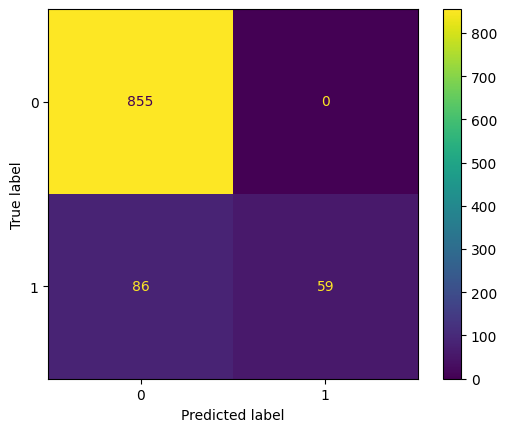

In [121]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [122]:
# Calculo do log_loss
print(f'Log Loss: {log_loss(y_test, y_pred_proba):.4f}')

Log Loss: 0.2274


## Treinamento do modelo com validação cruzada e tuning de hiperparâmetros

In [127]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [128]:
# Configuração do GridSearchCV com 5 folds e uso do recall como métrica de validação

rf_model_cv = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=51
)
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=51)
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=kfolds, scoring='recall', verbose=2)

In [129]:
# Treinar o modelo usando cross-validation para buscar os melhores hiperparâmetros

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=51, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=20, random_state=51),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

## Analise do resultado - GridSearchCV

In [ ]:
# Melhor estimador
best_model = grid_search.best_estimator_


In [132]:
# Melhores hiperparâmetros

best_params = grid_search.best_params_

In [133]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
best_score = grid_search.best_score_
best_score

np.float64(0.6246305418719211)

## Análise dos resultados - Baseline

In [135]:
# Predições 

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

In [136]:
# Avaliação do modelo

print(f'Relatório de classificação')
print(classification_report(y_test, y_pred))

Relatório de classificação
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       855
           1       0.90      0.66      0.76       145

    accuracy                           0.94      1000
   macro avg       0.92      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [ ]:
# Avaliação do modelo

print(f'Relatório de classificação')
print(classification_report(y_test, y_pred))

Relatório de classificação
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       855
           1       0.90      0.66      0.76       145

    accuracy                           0.94      1000
   macro avg       0.92      0.82      0.86      1000
weighted avg       0.94      0.94      0.94      1000



In [137]:
# Valores da curva ROC - TPR vs. FPR e Threshold

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

In [138]:
# Calculo do AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

In [139]:
# Curva ROC com valor do AUC

fig = px.area(
    x=fpr, 
    y=tpr, 
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels = dict(x='False Positive Rate', y='True Positive Rate'),
    width=700,
    height=500
)

fig.add_shape(
    type='line',
    line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_xaxes(constrain='domain')
fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.show()

In [140]:
# Matriz de confusão

conf_matrix = confusion_matrix(y_test, y_pred)

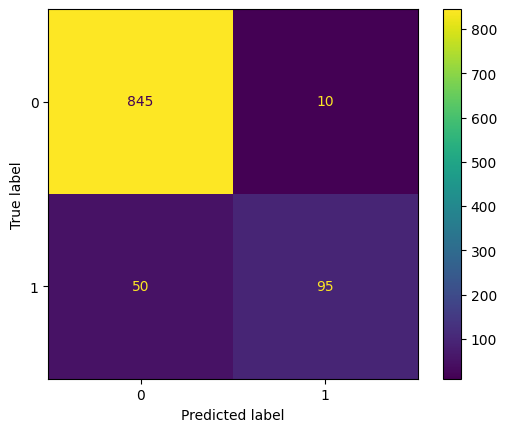

In [141]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [142]:
# Calculo do log_loss
print(f'Log Loss: {log_loss(y_test, y_pred_proba):.4f}')

Log Loss: 0.3116


# Ajuste do Threshold

In [148]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

recalls = []

# Calculo de métricas para cada threshold

for threshold in thresholds:
     y_pred_threshold = (y_pred_proba[:,1] >= threshold).astype(int)
     
     recall = recall_score(y_test, y_pred_threshold)
     
     recalls.append(recall)
     

In [149]:
# dataframes com resultados

df_threshold = pd.DataFrame({
    'Threshold': thresholds, 
    'Recall': recalls
})

In [150]:
df_threshold.head(10)

,Threshold,Recall
0,0.3,0.841379
1,0.4,0.772414
2,0.5,0.655172
3,0.6,0.503448
4,0.7,0.365517


In [186]:
best_threshold = df_threshold[df_threshold['Recall'] == df_threshold['Recall'].max()]

In [187]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=thresholds, y=recalls, name='Recall', line=dict(color='blue')))

fig.update_layout(
    title='Recall por Threshold',
    xaxis_title='Threshold',
    yaxis_title='Recall Score',
    width=800,
    height=500
)

# Métricas com mudança de Threshold

In [191]:
best_threshold['Threshold'].values

array([0.3])

In [192]:
y_pred = (y_pred_proba[:,1] >= best_threshold['Threshold'].values).astype(int)

In [193]:
# Avaliação do modelo

print(f'Relatório de classificação')
print(classification_report(y_test, y_pred))

Relatório de classificação
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       855
           1       0.45      0.84      0.59       145

    accuracy                           0.83      1000
   macro avg       0.71      0.83      0.74      1000
weighted avg       0.89      0.83      0.85      1000



In [196]:
# Matriz de confusão

conf_matrix = confusion_matrix(y_test, y_pred)

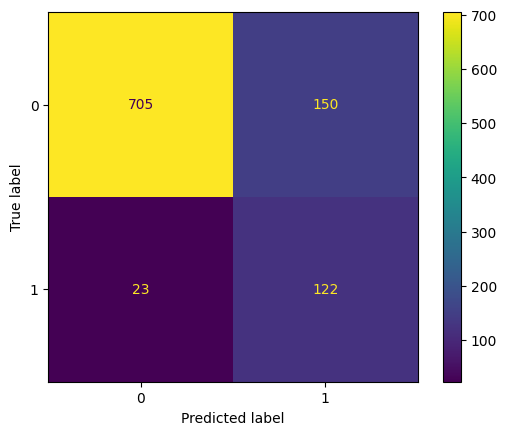

In [197]:
ConfusionMatrixDisplay(conf_matrix).plot()